In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
np.random.seed(10)

= Exxercice 4

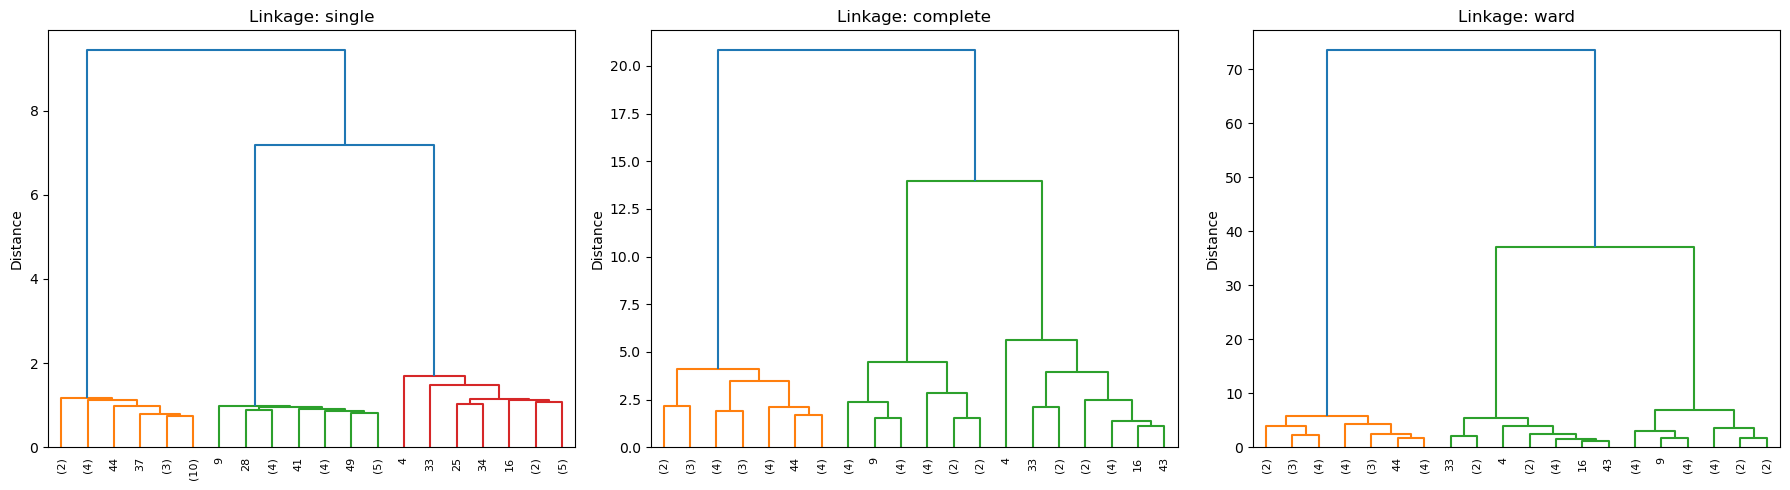

In [3]:
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, 
                               cluster_std=1.0, random_state=42)



idx = np.random.choice(len(X_blobs), 50, replace=False)
X_sub = X_blobs[idx]
y_sub = y_blobs[idx]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, method in zip(axes, ['single', 'complete', 'ward']):
    Z = linkage(X_sub, method=method)
    dendrogram(Z, ax=ax, truncate_mode='lastp', p=20, 
               leaf_rotation=90, leaf_font_size=8)
    ax.set_title(f"Linkage: {method}")
    ax.set_ylabel("Distance")
plt.tight_layout(); plt.show()


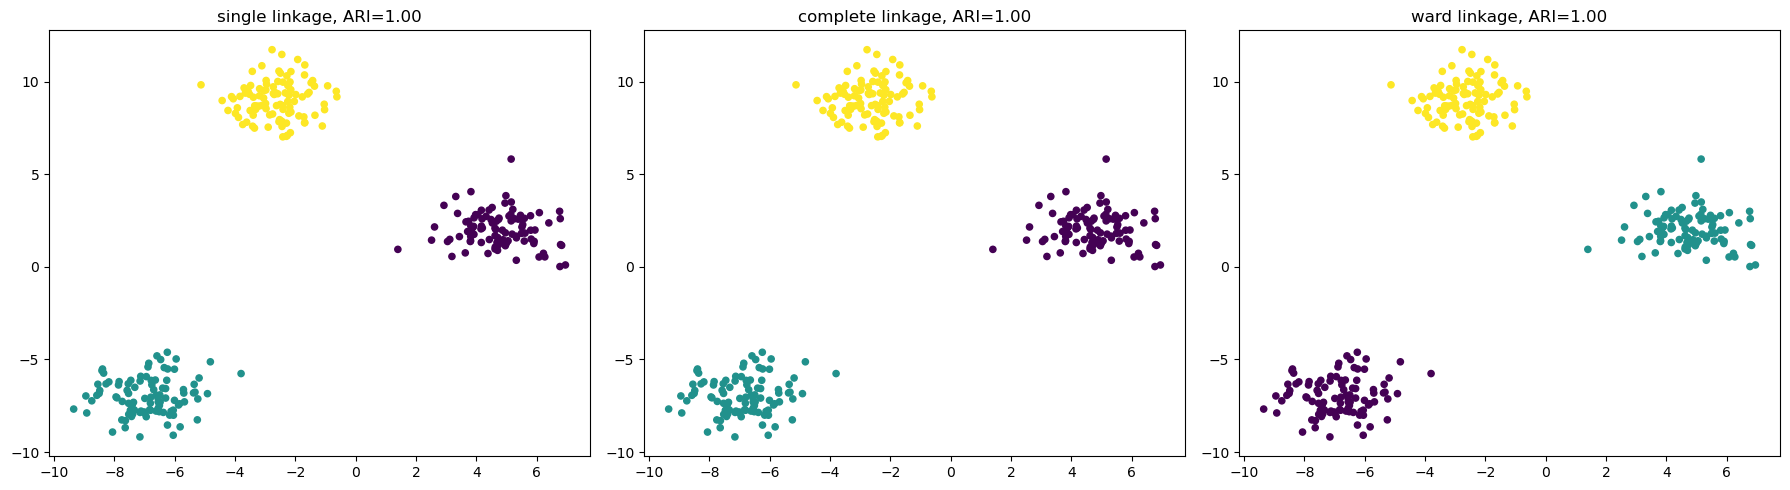

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, link in zip(axes, ['single', 'complete', 'ward']):
    agg = AgglomerativeClustering(n_clusters=3, linkage=link)
    labels_agg = agg.fit_predict(X_blobs)
    ari = adjusted_rand_score(y_blobs, labels_agg)
    ax.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_agg, 
               cmap='viridis', s=20)
    ax.set_title(f"{link} linkage, ARI={ari:.2f}")
plt.tight_layout(); plt.show()


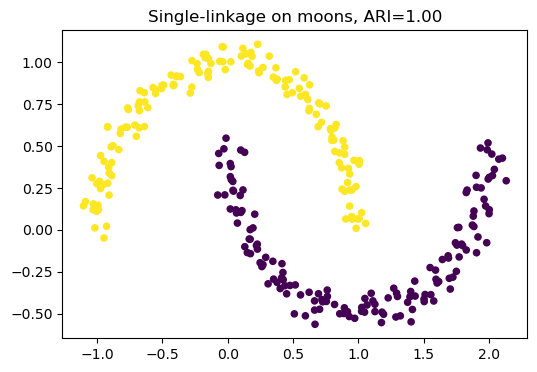

In [6]:
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, 
                               random_state=42)

agg_moons = AgglomerativeClustering(n_clusters=2, linkage='single')
labels_agg_moons = agg_moons.fit_predict(X_moons)
ari = adjusted_rand_score(y_moons, labels_agg_moons)

plt.figure(figsize=(6, 4))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_agg_moons, 
            cmap='viridis', s=20)
plt.title(f"Single-linkage on moons, ARI={ari:.2f}")
plt.show()

